<a href="https://colab.research.google.com/github/iamakshay0228/linear-regression/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## YES BANK STOCK CLOSING PRICE PREDICTION

---



## PROJECT DISCRIPTION

---



# Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month.

# PROBLEM STATEMENT  

---
The main objective is to predict the stock’s closing price of the month.


In [1]:
import numpy as np
import pandas as pd
from numpy import math
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import (Lasso,Ridge,ElasticNet)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-5fb873ac7b93>:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [2]:
url='https://drive.google.com/file/d/1qE-lEu9VDFTQ26ivGoBpg4Ztoe1sek7f/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
YB_df=pd.read_csv(url)

In [3]:
YB_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
YB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
YB_df.count()

Date     185
Open     185
High     185
Low      185
Close    185
dtype: int64

In [ ]:
YB_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


## Exploratory Data Anlysis

In [ ]:
YB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [4]:
YB_df['Date'] = pd.to_datetime(YB_df['Date'],format='%b-%y').dt.strftime('%y-%m-%d')

In [5]:
YB_df.head()

,Date,Open,High,Low,Close
0,05-07-01,13.00,14.00,11.25,12.46
1,05-08-01,12.58,14.88,12.55,13.42
2,05-09-01,13.48,14.87,12.27,13.30
3,05-10-01,13.20,14.47,12.40,12.99
4,05-11-01,13.35,13.88,12.88,13.41


<Axes: xlabel='Close', ylabel='Density'>

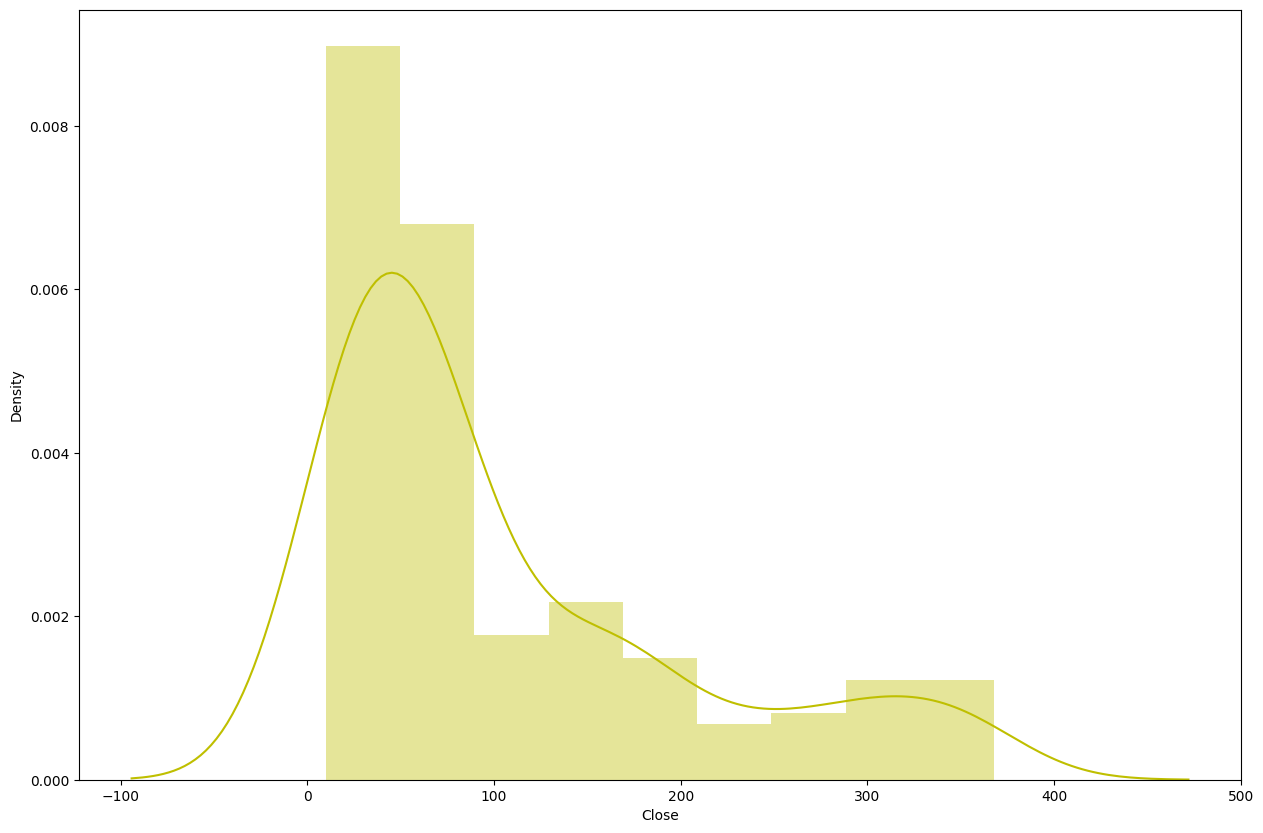

In [ ]:
# dependent variable 'Close'
plt.figure(figsize=(15,10))
sns.distplot(YB_df['Close'],color="y")

<Axes: xlabel='Close', ylabel='Density'>

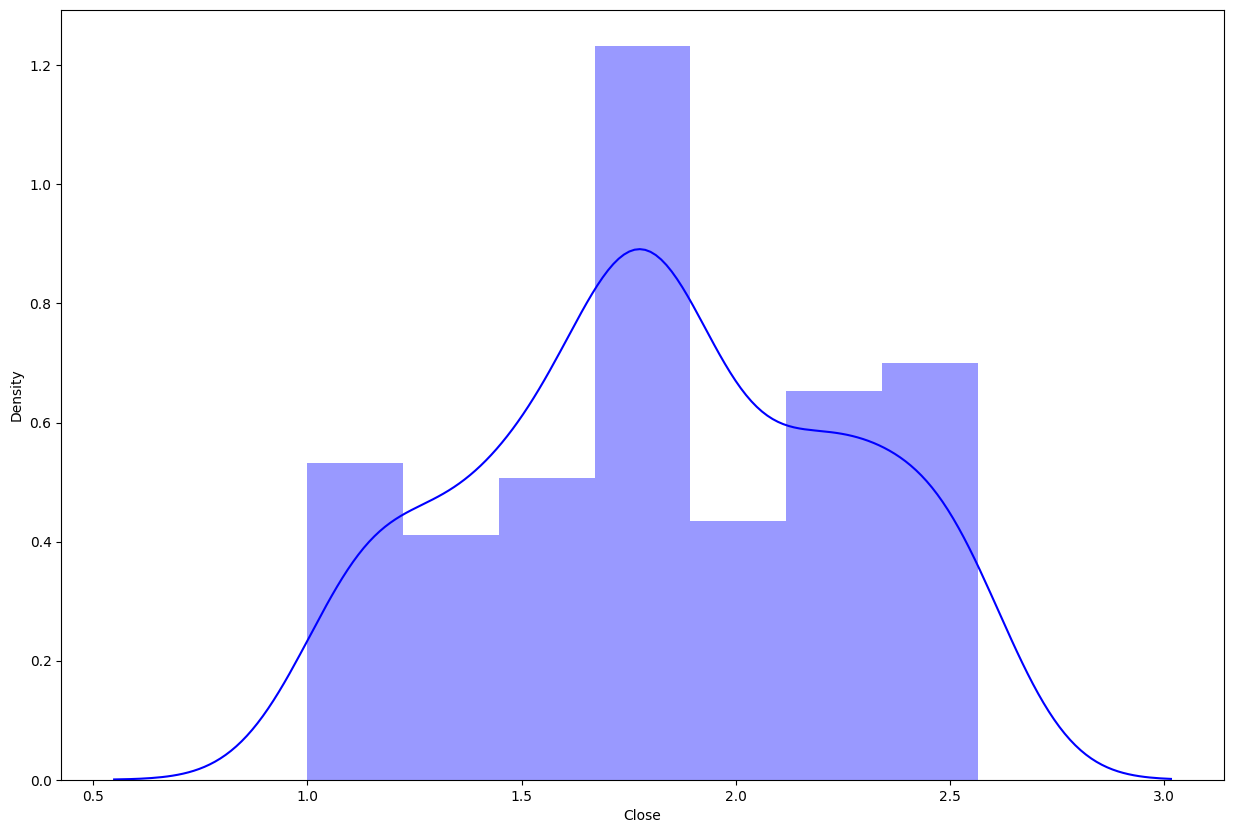

In [ ]:
# Dependent variable 'Close'
plt.figure(figsize=(15,10))
sns.distplot(np.log10(YB_df['Close']),color="b")

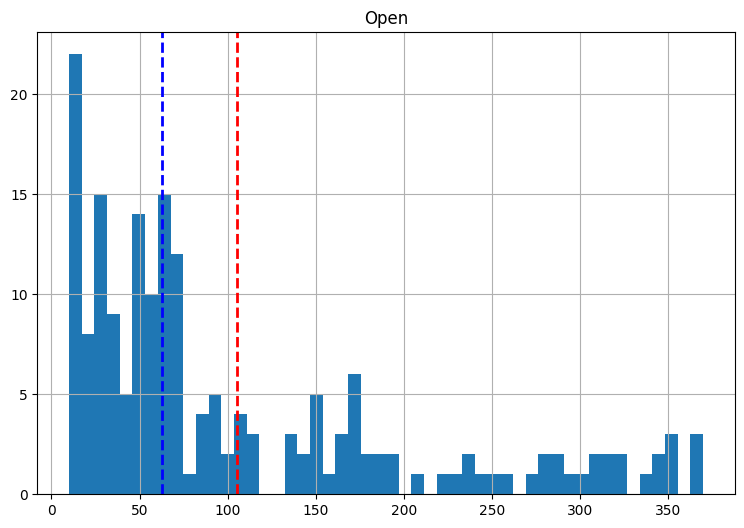

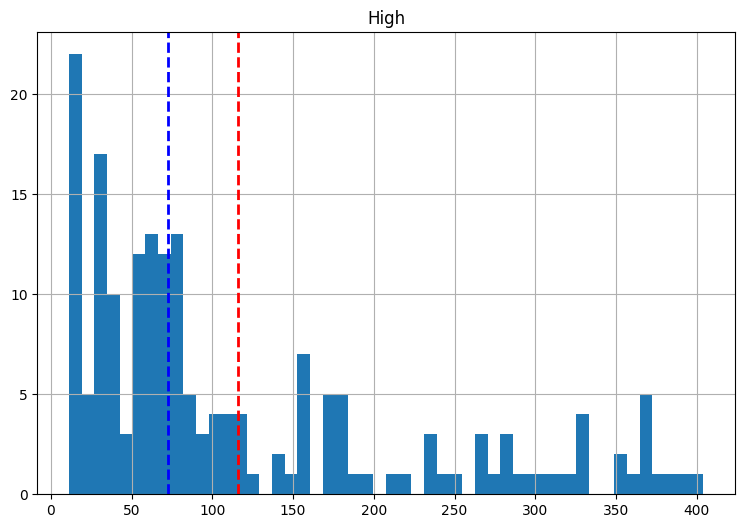

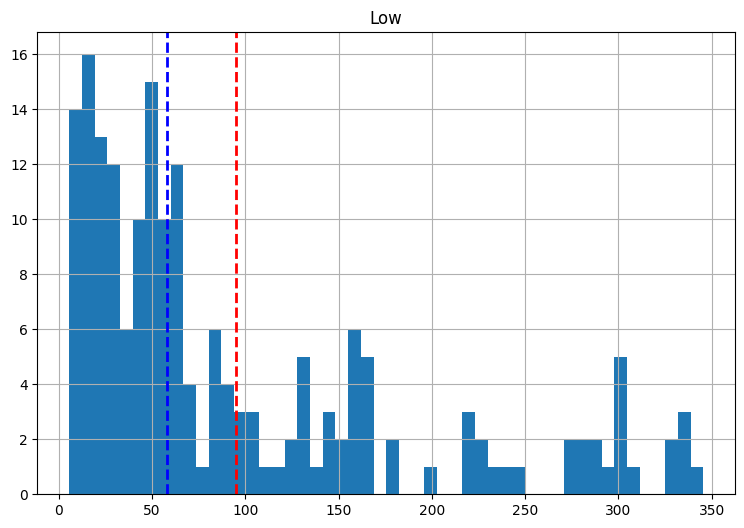

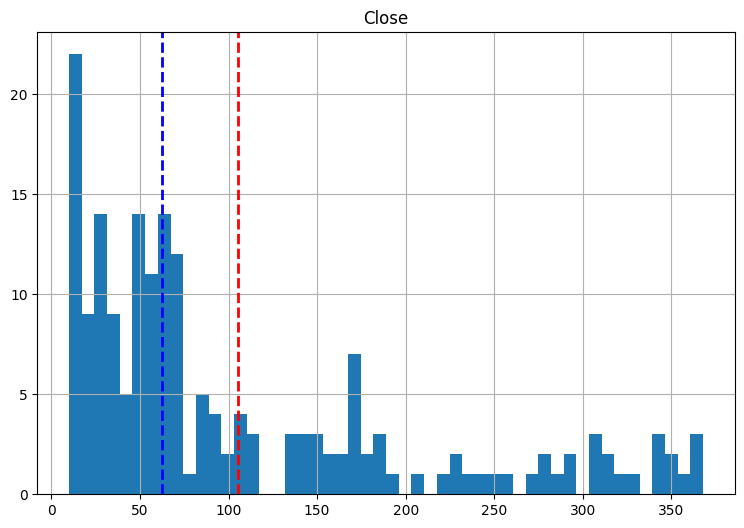

In [ ]:
# plot a bar plot for each categorical feature count
numeric_features= YB_df.describe().columns
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = YB_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure([go.Scatter(x=YB_df['Date'], y=YB_df['Close'])])
fig.show()

In [ ]:
# Checking for correlation

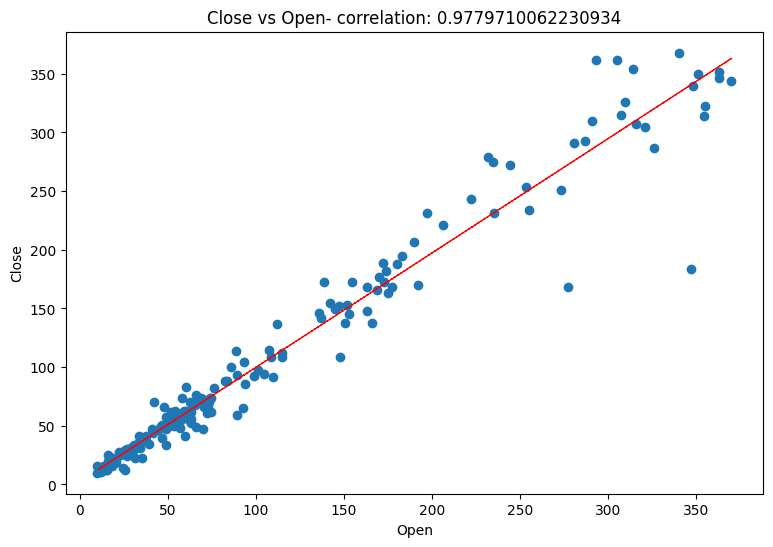

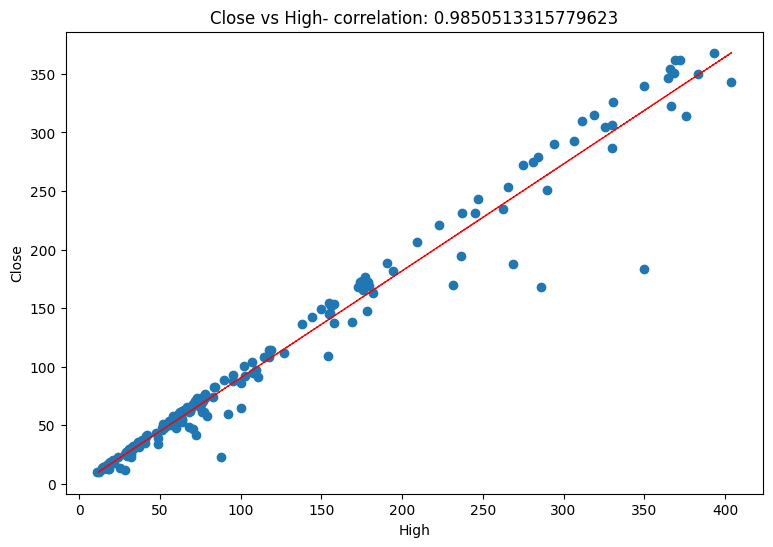

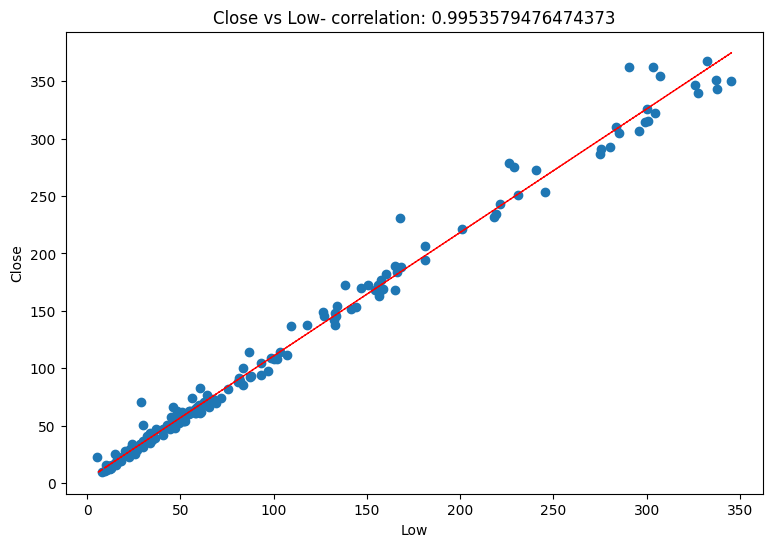

In [ ]:
for col in numeric_features[0:3]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = YB_df[col]
    label = YB_df['Close']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Close')
    ax.set_title('Close vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(YB_df[col], YB_df['Close'], 1)
    y_hat = np.poly1d(z)(YB_df[col])

    plt.plot(YB_df[col], y_hat, "r--", lw=1)

plt.show()

<Axes: >

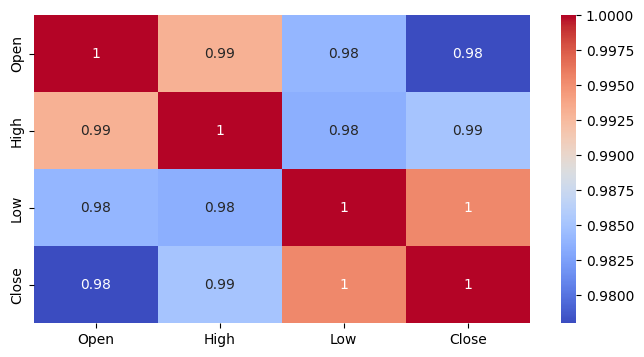

In [ ]:
plt.figure(figsize=(8,4))
correlation = YB_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
##REMOVING MULTICOLINEARITY
YB_df['Avg']= YB_df[['High','Low','Open']].mean(axis=1).round(2)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(YB_df[[i for i in YB_df.describe().columns]])

,variables,VIF
0,Open,3.341628e+08
1,High,3.960572e+08
2,Low,2.770299e+08
3,Close,4.284194e+02
4,Avg,2.993476e+09


<Axes: >

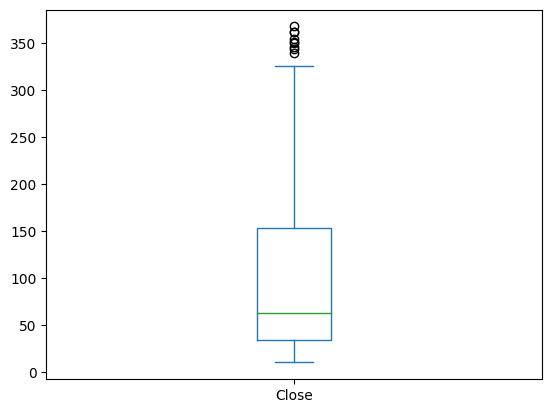

In [ ]:
YB_df['Close'].plot(kind='box')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc80dee0220>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc80dee0f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc80dee0ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc80dee2650>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc80dee25f0>],
 'means': []}

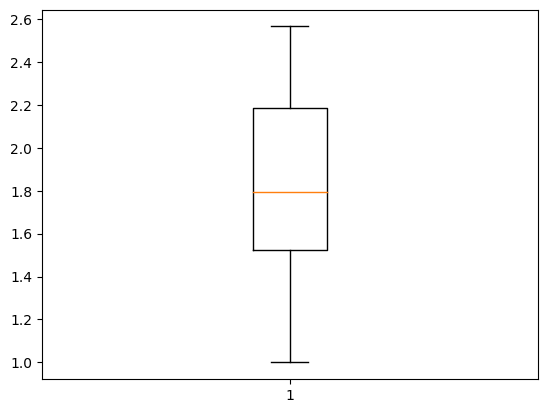

In [ ]:
plt.boxplot(x=np.log10(YB_df['Close']))

<Axes: >

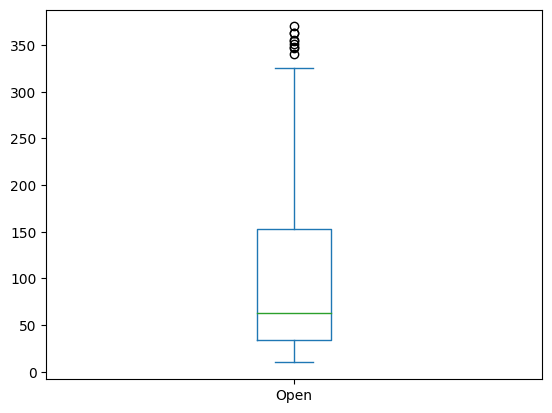

In [ ]:
YB_df['Open'].plot(kind='box')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc8089c7d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc80deafc40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc80deacdc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc80deaeb00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc80deae980>],
 'means': []}

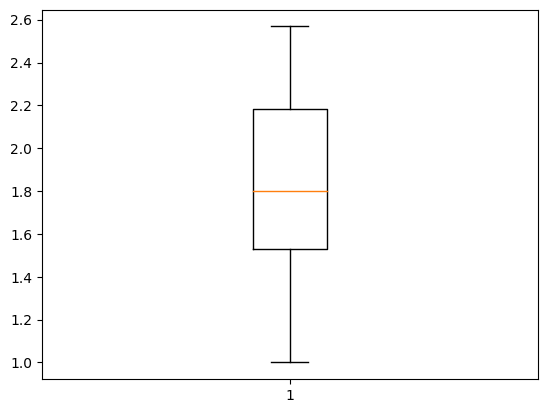

In [ ]:
plt.boxplot(x=np.log10(YB_df['Open']))

<Axes: >

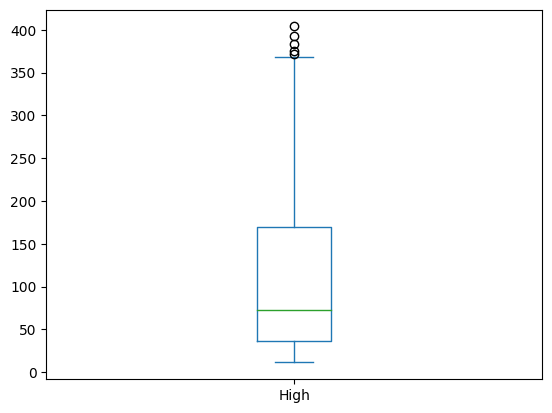

In [ ]:
YB_df['High'].plot(kind='box')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc808aff250>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc80ebef130>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc80ebee080>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc80ebef2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc80ebefa60>],
 'means': []}

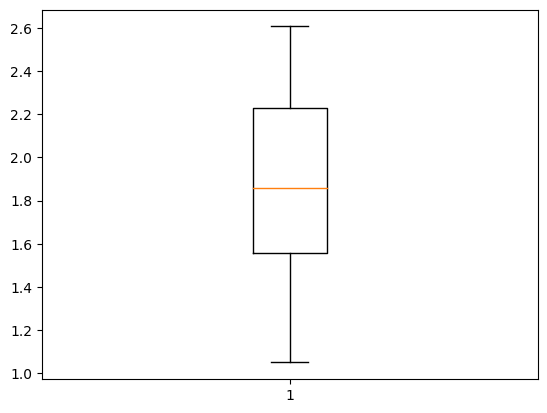

In [ ]:
plt.boxplot(x=np.log10(YB_df['High']))

<Axes: >

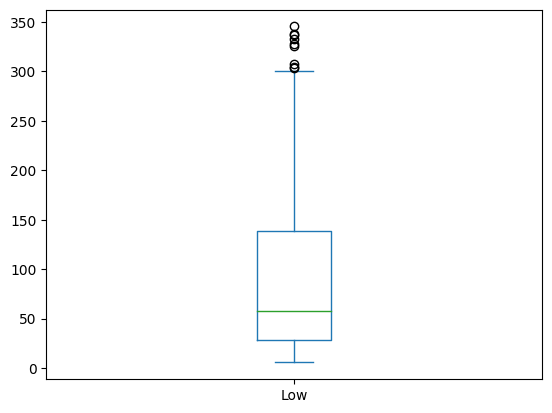

In [ ]:
YB_df['Low'].plot(kind='box')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc80e06d750>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc80e06c790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc80e06ca90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc80e06ff10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc80e06e410>],
 'means': []}

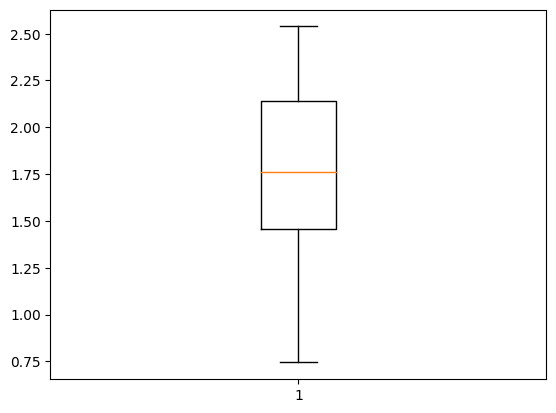

In [ ]:
plt.boxplot(x=np.log10(YB_df['Low']))

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(YB_df[[i for i in YB_df.describe().columns]])

,variables,VIF
0,Open,3.341628e+08
1,High,3.960572e+08
2,Low,2.770299e+08
3,Close,4.284194e+02
4,Avg,2.993476e+09


## Modeling

In [ ]:
dependent_variable ='Close'
independent_variable= 'High','Low','Open','Avg'

In [ ]:
Y= np.log10(YB_df['Close'])
X= YB_df[['High','Low','Open','Avg']].apply(np.log10)


## Scaling the Data

In [ ]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

## Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X,Y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(148, 4)
(37, 4)


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, Y_train)

In [ ]:
reg.score(X_train, Y_train)

0.9951721981228238

In [ ]:
reg.coef_

array([ 0.21105428,  0.50418787, -0.94052986,  1.22426503])

In [ ]:
reg.intercept_

0.015186152739944836

In [ ]:
Y_pred = reg.predict(X_test)

In [ ]:
Y_pred

array([1.4923911 , 2.14805936, 1.66188379, 2.14969445, 1.82574095,
       1.50808261, 2.36594461, 1.2267379 , 1.14805807, 2.34435985,
       2.47726939, 1.94425469, 2.18459158, 1.76981107, 2.53179597,
       2.42427508, 1.86780302, 1.44681118, 2.42593087, 1.70693503,
       0.96961156, 2.07433412, 2.17187189, 1.77411331, 2.33861575,
       1.69564443, 2.40140144, 1.13603302, 2.03325749, 1.72217345,
       2.57000081, 2.54424413, 1.86850165, 2.22427412, 1.59443763,
       1.6805872 , 2.41726416])

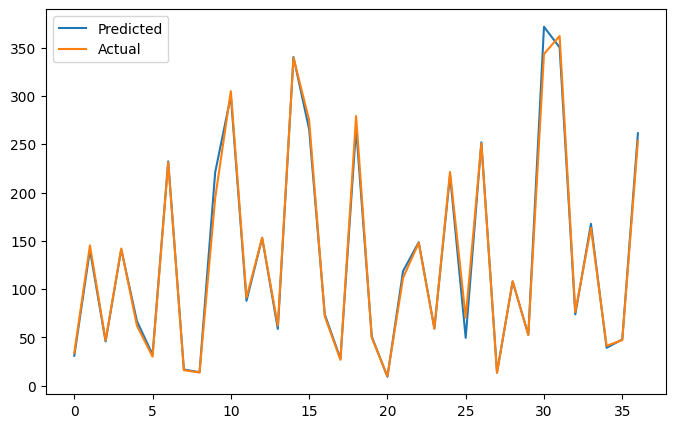

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(Y_pred))
plt.plot(np.array(10**(Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(Y_test), 10**(Y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 69.92976518274949
RMSE : 8.362401878811463


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(Y_test), 10**(Y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(Y_test), 10**(Y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.9937872804721887
Adjusted R2 :  0.9930106905312123


#ML Model 2
##**Ridge Regression with cross validation**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
Y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
Y_pred_ridge

array([1.49324352, 2.14758211, 1.67250014, 2.14590742, 1.82253423,
       1.50601957, 2.36420008, 1.22093309, 1.14304198, 2.34426456,
       2.47688881, 1.94915109, 2.18145026, 1.76805636, 2.52876277,
       2.42372276, 1.86423929, 1.44324873, 2.42577126, 1.70752146,
       0.97182924, 2.07318319, 2.17590507, 1.77051583, 2.33557356,
       1.70232046, 2.40393708, 1.1300795 , 2.03126725, 1.72494465,
       2.57047718, 2.54419462, 1.86650924, 2.22367365, 1.59216177,
       1.67855072, 2.41376578])

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.0012152422533272557


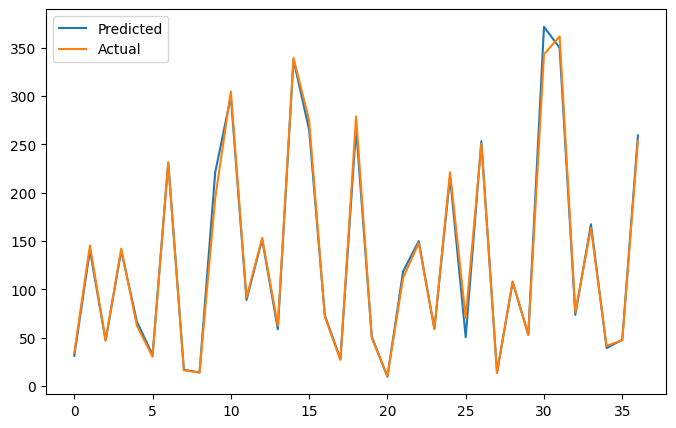

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(Y_pred_ridge))
plt.plot(np.array(10**(Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(10**(Y_test), 10**(Y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(Y_test), 10**(Y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(Y_test), 10**(Y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 69.57006821561431
RMSE : 8.340867353915558
R2 : 0.9938192367695676
Adjusted R2 :  0.9930466413657636


#ML Model 3
##**Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, Y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(X_train, Y_train)

0.9946655321201322

In [ ]:
lasso.coef_


array([ 0.74167561,  0.69545796, -0.43504357,  0.        ])

In [ ]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -0.0011365094468285882


In [ ]:
Y_pred_lasso = lasso_regressor.predict(X_test)

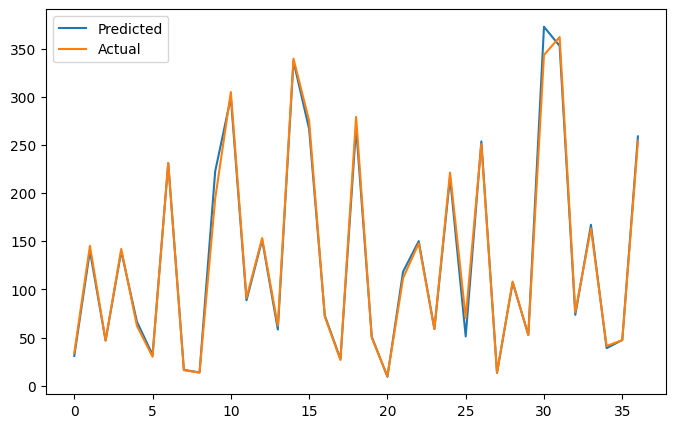

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(Y_pred_lasso))
plt.plot(10**(np.array(Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(10**(Y_test), 10**(Y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(Y_test), 10**(Y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(Y_test), 10**(Y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 69.55060297898609
RMSE : 8.339700413023605
R2 : 0.9938209661055005
Adjusted R2 :  0.9930485868686881


#ML Model 3
## Elasticnet Regression

In [ ]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(X_train,Y_train)

ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(X_train,Y_train)

0.8752187545009414

In [ ]:
Y_pred_en = elasticnet.predict(X_test)

In [ ]:
Y_pred_en

array([1.6098855 , 2.04283534, 1.77060942, 2.02654236, 1.79813362,
       1.58124693, 2.17581283, 1.40857386, 1.3632475 , 2.12879762,
       2.25745021, 1.92828001, 2.05282538, 1.78401472, 2.2869334 ,
       2.19224399, 1.83870795, 1.54903191, 2.19082479, 1.74604315,
       1.26142674, 1.97545319, 2.05922501, 1.7665161 , 2.14712702,
       1.69507274, 2.20911141, 1.35812154, 1.95466781, 1.77542618,
       2.30741445, 2.26269996, 1.82773086, 2.08655685, 1.6563201 ,
       1.72454078, 2.20293944])

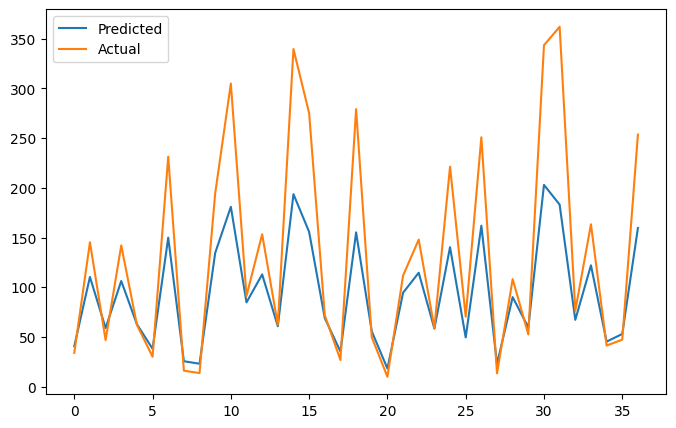

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(Y_pred_en))
plt.plot(10**(np.array(Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(10**(Y_test), 10**(Y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(Y_test), 10**(Y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(Y_test), 10**(Y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 4336.032170136678
RMSE : 65.84855480674332
R2 : 0.6147770314082022
Adjusted R2 :  0.5666241603342275


In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05, 'l1_ratio': 0.4}

Using  {'alpha': 1e-05, 'l1_ratio': 0.4}  the negative mean squared error is:  -0.001135131746253878


In [ ]:
Y_pred_elastic = elastic_regressor.predict(X_test)

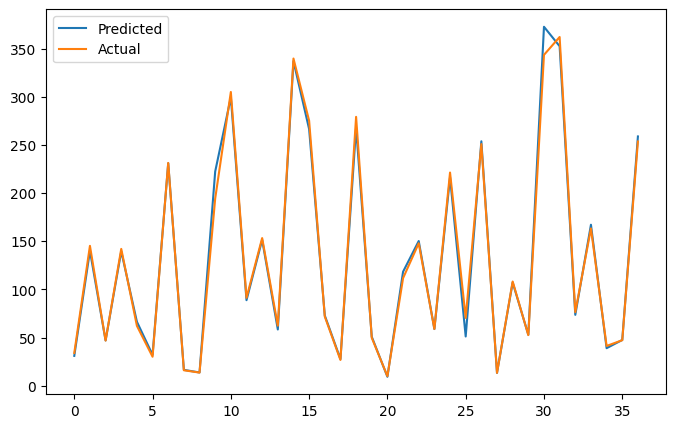

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(Y_pred_elastic))
plt.plot(10**(np.array(Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(10**(Y_test), 10**(Y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(Y_test), 10**(Y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(Y_test), 10**(Y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 69.5494565435445
RMSE : 8.33963167912975
R2 : 0.993821067957435
Adjusted R2 :  0.9930487014521143
